# Numerical computation error evaluation

In [1]:
# import library
import numpy as np
import math
from scipy.fft import fft
import matplotlib.pyplot as plt
import src.utilities.utility_frequency_analysis as ut_freq
import src.utilities.utility_stl as ut_stl
import src.utilities.gen_synthetic as gen_syn

# Setup SDFT, Scipy.FFT functions, and generate dataset

In [2]:
def sdft(input_ts, window_size):
    results = []
    buffer = input_ts[:window_size]
    start_fft = fft(buffer)
    results.append(start_fft)
    for idx, newest_x in enumerate(input_ts[window_size:]):
        oldest_x = buffer[0]
        buffer = ut_stl.update_array(buffer, newest_x)
        start_fft = ut_freq.update_sDFT(start_fft, oldest_x, newest_x)
        results.append(start_fft)
    return results

def scipy_fft(input_ts, window_size):
    results = []
    for idx in range(len(input_ts) - window_size + 1):
        buffer = input_ts[idx:window_size + idx]
        results.append(fft(buffer))
    return results

# Generate synthetic 2 and 3.1
syn_31 = gen_syn.generate_syn3_1(is_export=False)
syn_2 = gen_syn.generate_syn2(is_export=False)
syn_datas = [syn_2, syn_31]

# SDFT and FFT computation

In [3]:
error_results = []
for syn_data in syn_datas:
    # Time series do not include trend
    S = np.array(syn_data['seasonal'])
    R = np.array(syn_data['residual'])
    ts = S + R
    freq = int(max(syn_data['main_length']))
    window_size = math.ceil(freq * 5)       # We can vary window size
    ts = ut_stl.Znormalization(ts)
    sdft_results = sdft(ts, window_size)
    fft_results = scipy_fft(ts, window_size)
    error_result = []
    for sdft_result, fft_result in zip(sdft_results, fft_results):
        error_result.append(abs(sdft_result[0] - fft_result[0]))        # mean absolute error (SDFT-FFT)
    error_results.append(error_result)

# Numerical error plotting

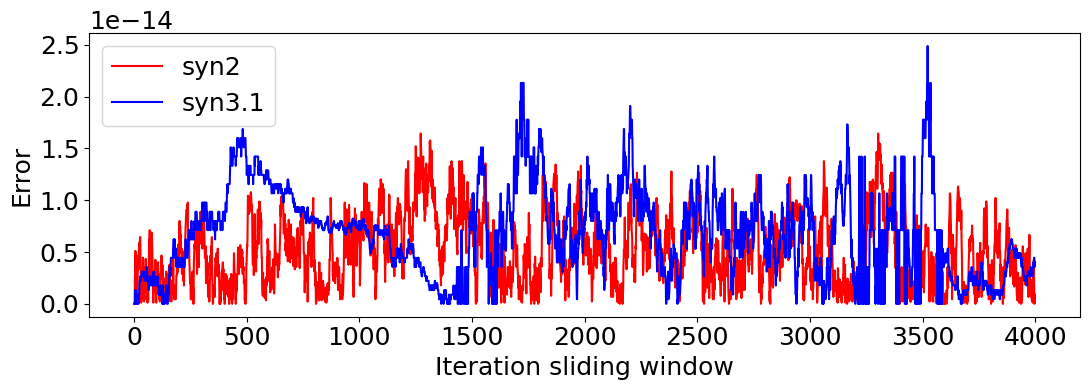

In [4]:
plt.figure(figsize=(11, 4))
plt.plot(error_results[0][:4000], 'r', label='syn2')
plt.plot(error_results[1][:4000], 'blue', label='syn3.1')
plt.xlabel('Iteration sliding window', fontsize = 18)
plt.ylabel('Error', fontsize = 18)
plt.gca().yaxis.offsetText.set_fontsize(18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize= 18)
plt.tight_layout()
plt.show()